# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
import statsmodels
import seaborn as sns
sns.set()

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [57]:
pd.options.mode.chained_assignment = None  # default='warn'

# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

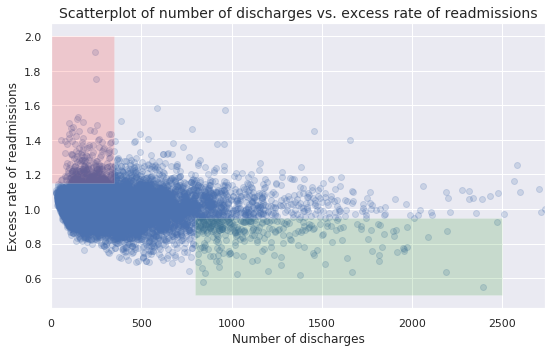

In [58]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Data Exploration

The preliminary recommendations are based on the observed difference of sample means in populations below 100 and above 1000. The validity of this analysis would therefore be based on whether these observed differences in means is significant.

We first examine if there is any linear relationship between number of discharges and readmission rate.

In [59]:
from scipy.stats import pearsonr
pearsonr(x, y)

(-0.09309554287590441, 1.5022756426464526e-23)

The Pearson corelation coefficient is very close to zero and shows *no indication that the values are linearly correlated.* 

Next, a Linear Regression is performed using Orthogonal Least Squares (OLS).

In [61]:
import statsmodels.api as sm
ols_model = sm.OLS(y, sm.add_constant(x))
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.50e-23
Time:                        13:03:41   Log-Likelihood:                 11177.
No. Observations:               11494   AIC:                        -2.235e+04
Df Residuals:                   11492   BIC:                        -2.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0179      0.001    757.349      0.0

The R-squared value is $0.9$%, indicating this linear model does not explain a lot of variance in the values. In addition, a high value of kurtosis, greater than 3, indicates that the relationship between the variables is not linear.

We look at the residuals to see if they follow a normal distribution.

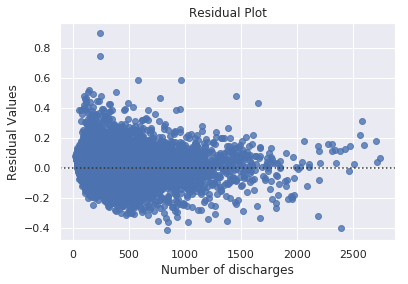

In [67]:
_ = sns.residplot(x, y)
_ = plt.xlabel('Number of discharges')
_ = plt.ylabel('Residual Values')
_ = plt.title('Residual Plot')

There are some high valued residuals observed at both ends of extreme values, that might skew the means. These outliers are also observed in the following quantile plot.

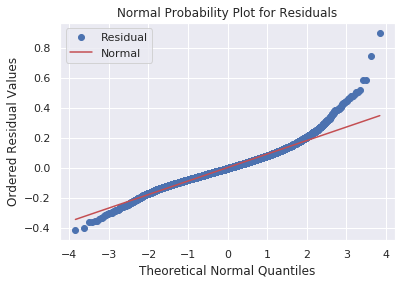

In [65]:
from scipy.stats import probplot
_ = probplot(ols_result.resid, dist='norm', plot=plt)
_ = plt.xlabel('Theoretical Normal Quantiles')
_ = plt.ylabel('Ordered Residual Values')
_ = plt.legend(['Residual', 'Normal'])
_ = plt.title('Normal Probability Plot for Residuals')

There are many residuals that are far away from the normal distribution, indicating that the error term in the linear regression does not follow normal distribution, indicating a presence of outliers.

To verify the presence of outliers and identify the influential observations, an Influence Plot and a Normalized Residual Plot are plotted for the dataset.

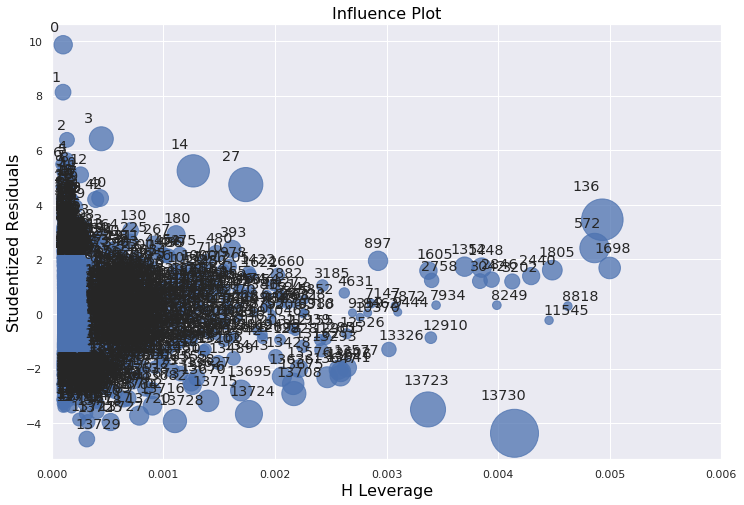

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
_ = ax.set_xlim((0,  0.006))
fig = sm.graphics.influence_plot(ols_result, ax=ax)

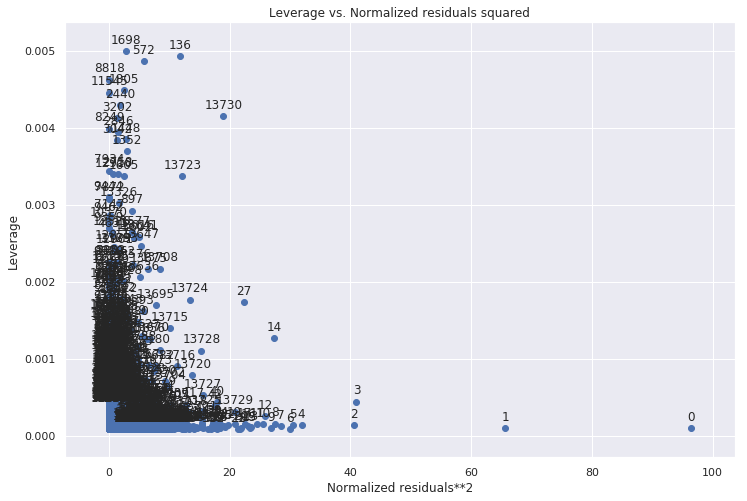

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_leverage_resid2(ols_result, ax=ax)

The plots show that there are highly influential observations that are skewing the means. Examples are points at 13730, 136, 572 etc;

## Hypothesis Test Setup

The preliminary statistics relied on observed difference of means as a basis for providing recommendations. The hypothesis test therefore will check if the observed differences are significant. To compare means, two sample populations are extracted: one less than 100 and other greater than 1000. The observations between 100 and 1000 inclusive are not used for this test.

The null hypothesis says that the difference of means between these two populations is zero:
> $\mu_{< 100} - \mu_{> 1000} = 0$

The alternative hypothesis is then that the difference of means is not zero:
> $\mu_{< 100} - \mu_{> 1000} \ne 0$

The test is two-sided.

Since there are outliers affecting the means, some of these outliers are removed.

In [70]:
# Extract samples < 100
thres = 100
x_pd = pd.Series(x)
y_pd = pd.Series(y)

x_less = x_pd[x_pd < thres]
y_less = y_pd[x_pd < thres]

The residual and influence plots again show the presence of highly influential observations.

In [72]:
model_ols_less  = sm.OLS(y_less, sm.add_constant(x_less)).fit()

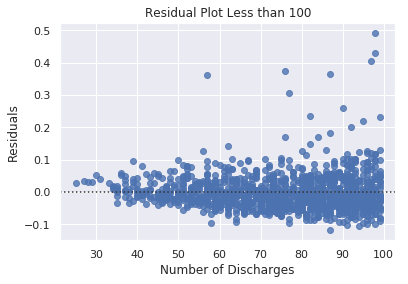

In [73]:
_ = sns.residplot(x_less, y_less)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Residuals')
_ = plt.title('Residual Plot Less than 100')

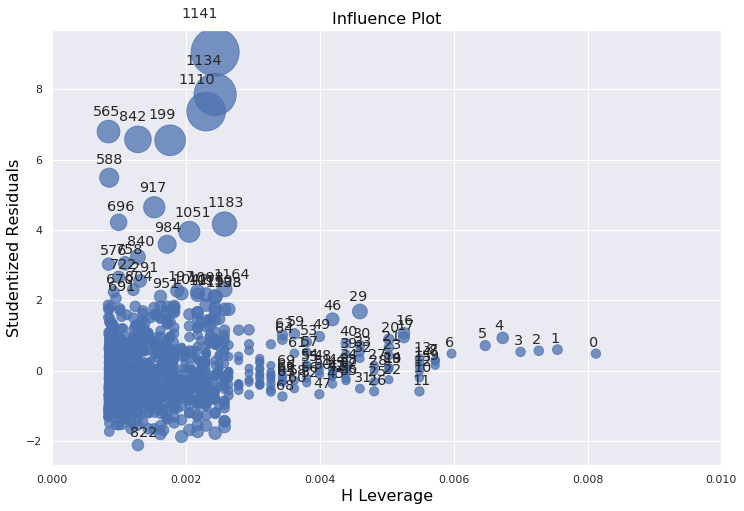

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
_ = ax.set_xlim((0,  0.01))
fig = sm.graphics.influence_plot(model_ols_less, ax=ax)

To remove outliers, both DFFITs or Cooks Distance can be used. Both end up identifying the same points as outliers.

In [77]:
# Get Influence
ols_res_less = model_ols_less.get_influence()

# DFFITS Internal
# Returned thres is the value at which 
ols_res_dffits_internal, thres =  ols_res_less.dffits_internal

# Cooks Distance
n = len(x_less)
p = 2
thres_2 = 4/(n-p-1)
ols_res_cooks = ols_res_less.cooks_distance[0]

In [82]:
# Remove Outliers - Less
less_keep = np.logical_and(abs(ols_res_dffits_internal) > thres, ols_res_cooks > thres_2)
x_less_clean = x_less[~less_keep]
y_less_clean = y_less[~less_keep]

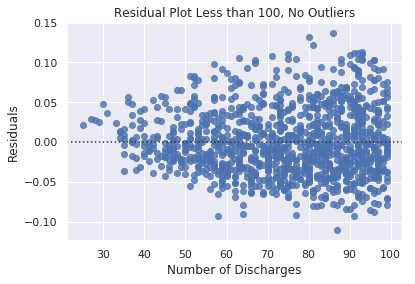

In [85]:
_ = sns.residplot(x_less_clean, y_less_clean)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Residuals')
_ = plt.title('Residual Plot Less than 100, No Outliers')

The residual plot shows that the values are distributed closer to zero than before.

In [23]:
model_ols_less_clean  = sm.OLS(y_less_clean, sm.add_constant(x_less_clean)).fit()

In [84]:
model_ols_less_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     207.3
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           2.47e-43
Time:                        14:45:14   Log-Likelihood:                 2030.1
No. Observations:                1153   AIC:                            -4056.
Df Residuals:                    1151   BIC:                            -4046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0957      0.006    196.692      0.000       1.085       1.107
0             -0.0011    7.3e-05    -14.397      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       39.425   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.873
Skew:                           0.468   Prob(JB):                     4.90e-10
Kurtosis:                       2.871   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

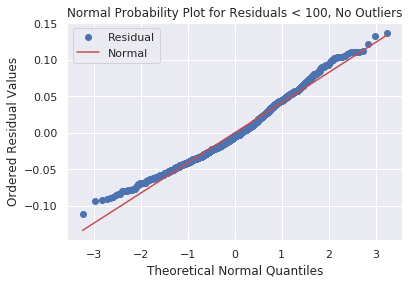

In [96]:
_ = probplot(model_ols_less_clean.resid, dist='norm', plot=plt)
_ = plt.xlabel('Theoretical Normal Quantiles')
_ = plt.ylabel('Ordered Residual Values')
_ = plt.legend(['Residual', 'Normal'])
_ = plt.title('Normal Probability Plot for Residuals < 100, No Outliers')

The Kurtosis is around 3, and the quantile-quantile plot with respect to normal distribution shows that, the distribution is now close to a normal distribution.

In [88]:
less_mean = np.mean(y_less_clean)
less_percent = np.sum(y_less_clean > 1) / len(y_less_clean)
print('The new sample mean is {0:2.4} and percentage readmission rate more than 1 is {1:2.2%}'.format(less_mean, less_percent))

The new sample mean is 1.017 and percentage readmission rate more than 1 is 62.27%


We observe that the *mean has gone down after removing outliers.*

Next, a similar analysis for samples above 1000.

In [89]:
# Samples above 1000
thres_m = 1000
x_more = x_pd[x_pd > thres]
y_more = y_pd[x_pd > thres]

In [28]:
model_ols_more  = sm.OLS(y_more, sm.add_constant(x_more)).fit()

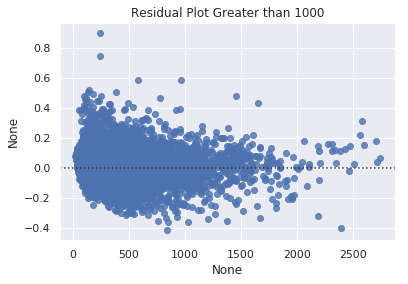

In [30]:
_ = sns.residplot(x_more, y_more)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Residuals')
_ = plt.title('Residual Plot Greater than 1000')

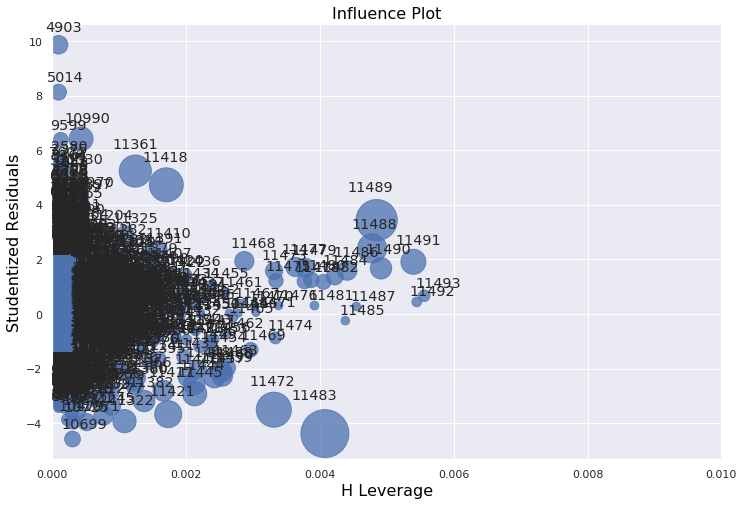

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
_ = ax.set_xlim((0,  0.01))
fig = sm.graphics.influence_plot(model_ols_more, ax=ax)

The residual and influence plots show the presence of highly influential observations. These outliers are filtered out using dffits and cooks distance.

In [91]:
ols_res_more = model_ols_more.get_influence()

# DFFITS Internal
ols_res_dffits_internal, thres =  ols_res_more.dffits_internal

# Cooks Distance
n = len(x_more)
p = 2
thres_2 = 4/(n-p-1)
ols_res_cooks = ols_res_more.cooks_distance[0]

In [92]:
# Remove Outliers - More
more_keep = np.logical_or(abs(ols_res_dffits_internal) > thres, ols_res_cooks > thres_2)
x_more_clean = x_more[~more_keep]
y_more_clean = y_more[~more_keep]

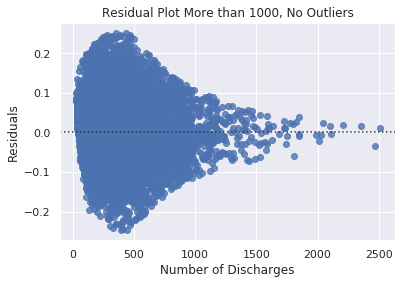

In [93]:
# Plot Residuals
_ = sns.residplot(x_more_clean, y_more_clean)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Residuals')
_ = plt.title('Residual Plot More than 1000, No Outliers')

The residual plot shows that variances are not uniform across the distribution.

In [94]:
model_ols_more_clean  = sm.OLS(y_more_clean, sm.add_constant(x_more_clean)).fit()

In [95]:
model_ols_more_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     52.72
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           4.10e-13
Time:                        15:15:51   Log-Likelihood:                 12631.
No. Observations:               10952   AIC:                        -2.526e+04
Df Residuals:                   10950   BIC:                        -2.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0121      0.001    827.882      0.000       1.010       1.014
0           -2.11e-05   2.91e-06     -7.261      0.000   -2.68e-05   -1.54e-05
==============================================================================
Omnibus:                       66.335   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.811
Skew:                           0.174   Prob(JB):                     1.14e-15
Kurtosis:                       3.171   Cond. No.                         705.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

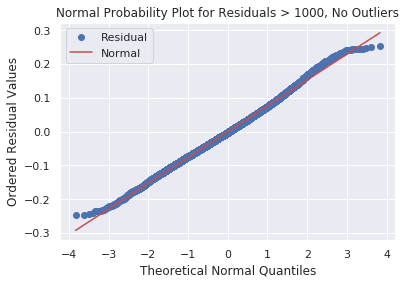

In [97]:
_ = probplot(model_ols_more_clean.resid, dist='norm', plot=plt)
_ = plt.xlabel('Theoretical Normal Quantiles')
_ = plt.ylabel('Ordered Residual Values')
_ = plt.legend(['Residual', 'Normal'])
_ = plt.title('Normal Probability Plot for Residuals > 1000, No Outliers')

The Kurtosis is around 3, and the quantile-quantile plot with respect to normal distribution shows that, the distribution is now close to a normal distribution.

In [99]:
more_mean = np.mean(y_more_clean)
more_percent = np.sum(y_more_clean > 1) / len(y_more_clean)
print('The new sample mean for group > 1000 is {0:2.4} and percentage readmission rate more than 1 is {1:2.2%}'.format( \
                                                                                                    more_mean, more_percent))

The new sample mean for group > 1000 is 1.005 and percentage readmission rate more than 1 is 51.20%


We observe that now *the mean has gone up after removing outliers* for this group > 1000.

## Check for conditions for parametric hypothesis testing

For comparing means between two groups using Independent two sample t-test, the following conditions must be met:

1. Dependent variable is continuous: The dependent variable 'Readmissions Rate' is continuous.
2. Categorical independent variables: The categorical variable here, though not explicitly defined is membership of group < 100 or > 1000.
3. Independence: Data from one hospital should not affect data from another hospital. 
4. Randomness: This condition does not apply, as data for most of the hospitals is available.
5. Normality: The quantile-quantile plot for both the distributions approximately follow the normal distribution. Kolmogorov-Smirnov test is further used to verify normality conditions below.
6. Homogeneity of variances: **This condition is violated as shown by Levene's test below.**

In [104]:
# Kolmogorov-Smirnov test for goodness of fit to normal distribution
from scipy.stats import kstest
ks, p_value = kstest(y_less_clean, 'norm')
print('Kolmogorov-Smirnov test for data < 100: Test Statistic={:2.5}, P-value={:2.5}'.format(ks, p_value))
ks, p_value = kstest(y_more_clean, 'norm')
print('Kolmogorov-Smirnov test for data > 1000: Test Statistic={:2.5}, P-value={:2.5}'.format(ks, p_value))

Kolmogorov-Smirnov test for data < 100: Test Statistic=0.81701, P-value=0.0
Kolmogorov-Smirnov test for data > 1000: Test Statistic=0.78771, P-value=0.0


Both distributions are approximately normal. 

In [106]:
# Check for Homogeneity of variances.
from scipy.stats import levene

levene(y_less_clean, y_more_clean)

LeveneResult(statistic=275.9761352605459, pvalue=2.694047318159824e-61)

*Levene's test shows that there is a significant difference in variances between the two groups. A non-parametric test might be more appropriate to show the difference of means is significant.* 

Running the independent two sample t-test below shows that the difference is significant. However, this result cannot be relied as one of the conditions of the test is violated. Large variances in the larger group (greater than 1000), leads to over-estimation of significance level. Even with the over-estimation, the p-value is well below 0.01.

In [41]:
# Directly using statsmodel
from scipy.stats import ttest_ind
ttest_ind(y_less_clean, y_more_clean)

Ttest_indResult(statistic=5.43693676146436, pvalue=5.52564491232291e-08)

In [107]:
## Non-parametric testing using permutation

In [108]:
significance_level = 0.01
num_trials= 10000

def permutation_sample(data_1, data_2):
    """Computes a permutation sample for merged data1 and data2"""
    
    # Concatenate data sets
    data = np.concatenate([data_1, data_2])

    # Draw permuted sample
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data_1)]
    perm_sample_2 = permuted_data[len(data_1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Define test statistic function as difference from mean to compare with
def diff_of_means(data_1, data_2):
    """Difference of means from data."""
    return np.mean(data_1) - np.mean(data_2)

# Draw samples and compute statistics
sample_means = draw_perm_reps(y_less_clean, y_more_clean, diff_of_means, num_trials)

# Step 3: Compute P-Value
p_value = np.sum(abs(sample_means) > abs(np.mean(less_mean) - np.mean(more_mean))) / len(sample_means)

if(p_value > significance_level):
    print('Cannot reject null hypothesis. P-value is {:2.5%}  > Significance level {:2.5%}'.format(p_value, significance_level))
else:
    print('Reject null hypothesis. P-value is {:2.5%} <= Significance level {:2.5%}'.format(p_value, significance_level))


Reject null hypothesis. P-value is 0.00000% <= Significance level 1.00000%


P-value is approximately zero indicating that there is a significant difference in the population means. So, the null hypothesis is rejected and we can say that the alternative hypothesis is true.

### Statistical significance vs Practical significance

A large sample size results in very narrow confidence intervals and a small margin of error. In this case, the actual difference of means in the populations is very small, but the result becomes significant due to large sample size. 

It might be better in this case, to use a statistical measure that is independent of the sample size, such as effect size. 

Effect size is most commonly measured using **Cohen's d** statistic as the difference of means divided by the pooled standard deviation.

In [113]:
# Cohen's d
cohens_d = (less_mean - more_mean) / (np.sqrt((np.std(y_less_clean) ** 2 + np.std(y_more_clean) ** 2) / 2))
print('Cohens-d = {:2.5}'.format(cohens_d))

Cohens-d = 0.19856


A Cohen's d score of less than $0.2$ is considered small and we can conclude that **the observed effect size is small.**

Even though the results are statistically significant, they are not practically significant as the effect size is small.

## Better visualization of the dataset

A scatter plot gives an instant view of what the relationship between two variables might be. However, it does not easily show outliers and influential points. It is harder to compare two populations and their variances with a scatter plot.

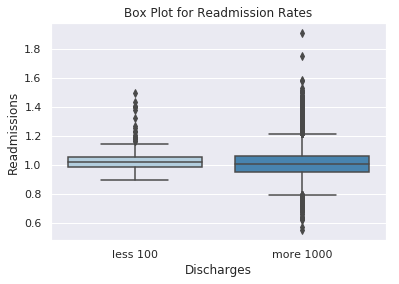

In [123]:
# Box Plot
d1 = pd.DataFrame({'Readmissions':y_less})
d1['Discharges'] = 'less 100'
d2 = pd.DataFrame({'Readmissions':y_more})
d2['Discharges'] = 'more 1000'
df = pd.concat([d1, d2])

_ = sns.boxplot(x=df['Discharges'], y=df['Readmissions'], palette='Blues')
_ = plt.title('Box Plot for Readmission Rates')

Looking at the box plot, we can instantly see that the means are not much different, but the variances are and both the categories have many outliers.

## Conclusion

Based on parametric testing results, the difference of populations is statistically significant at 1% significance level. 

However, the effect size is very small and we can conclude that statistical significance is due to high sample size and the difference of means is not practically significant.

The recommendations based on the premilinary analysis should not be given to the client.